In [ ]:
# nyc air bnb 2019 data cleaning task

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\User\Documents\NYC_air_bnb_2019.csv') 
# Inspect the first few rows
df.head()
# Get an overview of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Check for missing values
print(df.isnull().sum())


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
# Check for duplicate rows
print(df.duplicated().sum())


0


In [6]:
# Basic statistics
print(df.describe())


                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.00

In [7]:
# Check unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


id: 48895 unique values
name: 47896 unique values
host_id: 37457 unique values
host_name: 11452 unique values
neighbourhood_group: 5 unique values
neighbourhood: 221 unique values
latitude: 19048 unique values
longitude: 14718 unique values
room_type: 3 unique values
price: 674 unique values
minimum_nights: 109 unique values
number_of_reviews: 394 unique values
last_review: 1764 unique values
reviews_per_month: 937 unique values
calculated_host_listings_count: 47 unique values
availability_365: 366 unique values


In [11]:
# Fill missing numerical values with the mean/median
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [12]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')


In [ ]:
#above code converts last_review to date

In [13]:
# Fill blank or NaN names with "Unknown"
df['name'] = df['name'].replace('', 'Unknown')  # Replace empty strings
df['name'] = df['name'].fillna('Unknown')       # Replace NaN values


In [14]:
print(df[df['name'] == 'Unknown'])

             id     name   host_id host_name neighbourhood_group  \
2854    1615764  Unknown   6676776     Peter           Manhattan   
3703    2232600  Unknown  11395220      Anna           Manhattan   
5775    4209595  Unknown  20700823     Jesse           Manhattan   
5975    4370230  Unknown  22686810   Michaël           Manhattan   
6269    4581788  Unknown  21600904     Lucie            Brooklyn   
6567    4756856  Unknown   1832442  Carolina            Brooklyn   
6605    4774658  Unknown  24625694      Josh           Manhattan   
8841    6782407  Unknown  31147528  Huei-Yin            Brooklyn   
11963   9325951  Unknown  33377685  Jonathan           Manhattan   
12824   9787590  Unknown  50448556    Miguel           Manhattan   
13059   9885866  Unknown  37306329  Juliette           Manhattan   
13401  10052289  Unknown  49522403   Vanessa            Brooklyn   
15819  12797684  Unknown  69715276       Yan           Manhattan   
16071  12988898  Unknown  71552588    Andrea    

In [15]:
# Check for rows with any blank ('') or missing (NaN) values in the DataFrame
blank_rows = df[(df.isna().any(axis=1)) | (df.eq('').any(axis=1))]

# Display the rows with blanks or missing values
print(blank_rows)


             id                                               name   host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
19         7750                  Huge 2 BR Upper East  Cental Park     17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres     26394   
36        11452                        Clean and Quiet in Brooklyn      7355   
38        11943                          Country space in the city     45445   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

             host_name neighbourhood_gr

In [16]:
# Fill blank or NaN host_names with "Unknown"
df['host_name'] = df['host_name'].replace('', 'Unknown')  # Replace empty strings
df['host_name'] = df['host_name'].fillna('Unknown')       # Replace NaN values

In [17]:
#standardize case - convert all text columns to proper case i.e capitalize first letter
df['name'] = df['name'].str.title().str.strip()
df['host_name'] = df['host_name'].str.title().str.strip()
df['room_type'] = df['room_type'].str.title().str.strip()
df['neighbourhood_group'] = df['neighbourhood_group'].str.title().str.strip()
df['neighbourhood'] = df['neighbourhood'].str.title().str.strip()


In [18]:
# Ensure there are no missing values
print(df.isnull().sum())


id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [19]:
# Recheck duplicates
print(df.duplicated().sum())



0


In [20]:
# Confirm data types
print(df.dtypes)

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [21]:
#some rows in the name column has * in the names 
#removing the special character *
df['name'] = df['name'].str.replace('*', '', regex=False)


In [22]:
#detecting outliers


# List of columns to check for outliers
numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']

# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outliers = {}
    
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identifying outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers



In [23]:
# Detect outliers
outliers = detect_outliers(df, numerical_columns)

# Print outliers for each column
for column, outlier_data in outliers.items():
    print(f"Outliers detected in column: {column}")
    print(outlier_data)
    print("\n")

Outliers detected in column: price
             id                                               name    host_id  \
61        15396                 Sunny & Spacious Chelsea Apartment      60278   
85        19601                Perfect For A Family Or Small Group      74303   
103       23686  2000 Sf 3Br 2Bath West Village Private  Townhouse      93790   
114       26933  2 Br / 2 Bath Duplex Apt With Patio! East Village      72062   
121       27659                   3 Story Town House In Park Slope     119588   
...         ...                                                ...        ...   
48758  36420289    Rustic Garden House Apt, 2 Stops From Manhattan   73211393   
48833  36450896   Brand New 3-Bed Apt In The Best Location Of Fidi   29741813   
48839  36452721  Massage Spa. Stay Overnight. Authors Artist Dr...  274079964   
48842  36453160  Luxury Manhattan Penthouse+Hudson River+Empire...  224171371   
48856  36457700  Large 3 Bed, 2 Bath , Garden , Bbq , All You Need   66993

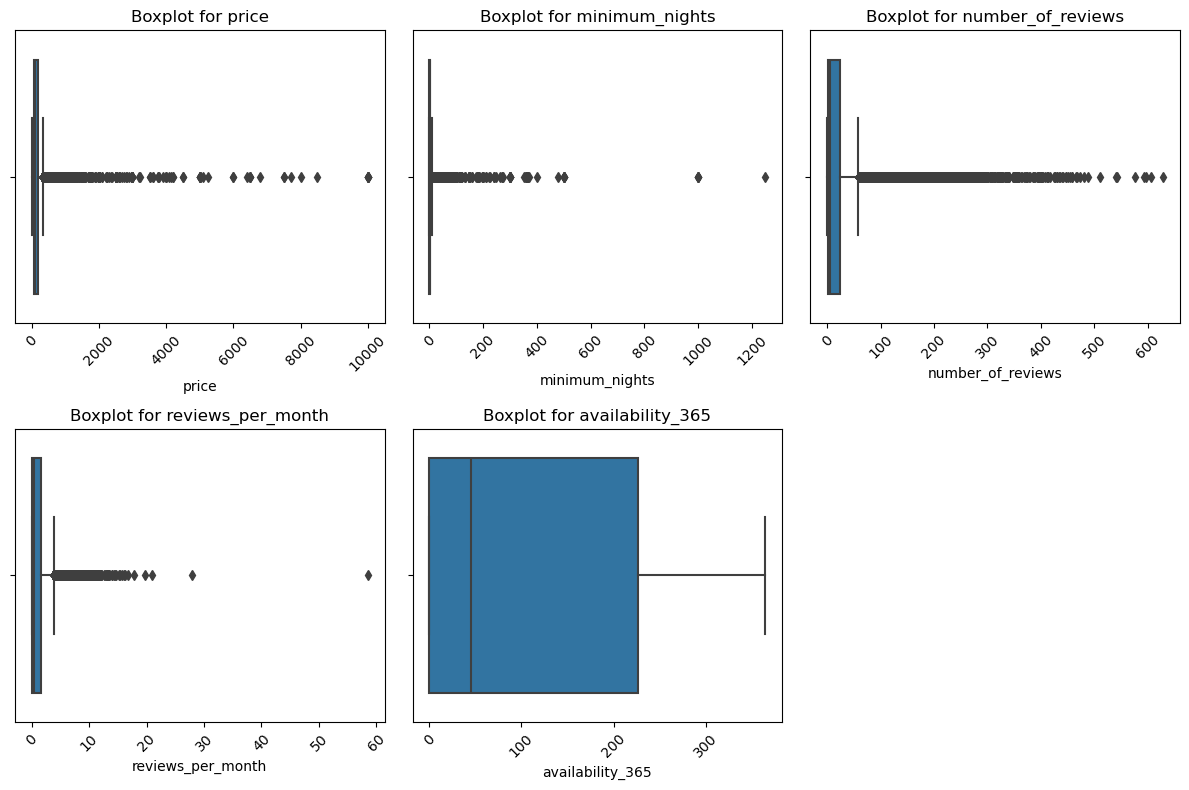

In [24]:
# Create a box plot for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Create subplots (2 rows, 3 columns)
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot for {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

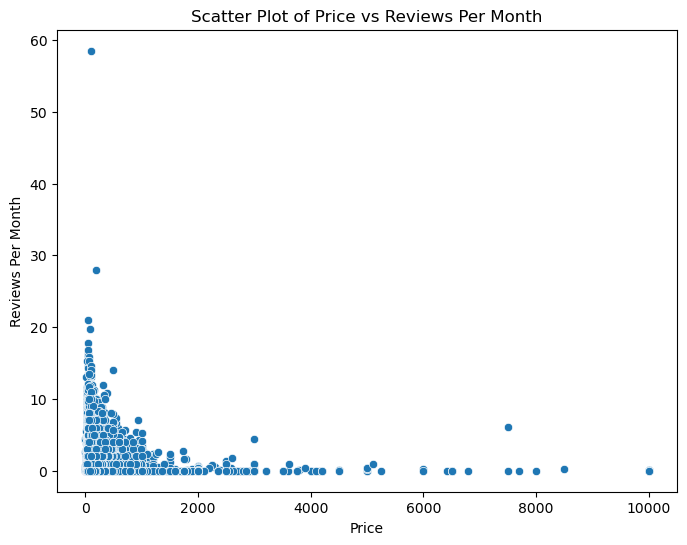

In [25]:
# Scatter plot of 'price' vs. 'reviews_per_month'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='reviews_per_month')

# Add title and labels
plt.title('Scatter Plot of Price vs Reviews Per Month')
plt.xlabel('Price')
plt.ylabel('Reviews Per Month')

plt.show()


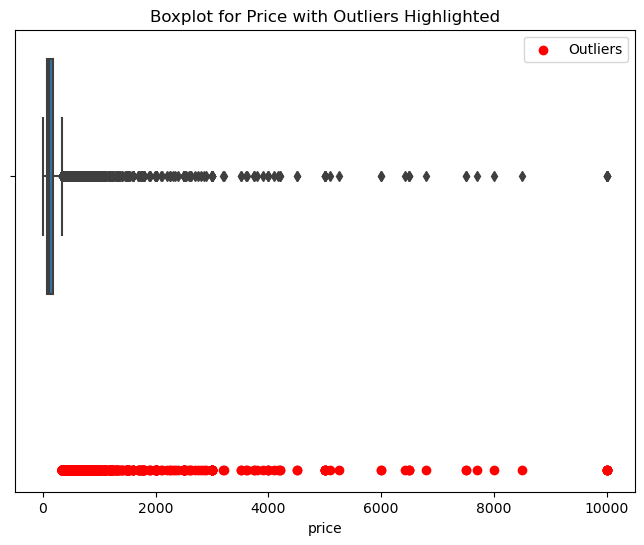

In [26]:
# Detect outliers for price column
outliers_price = outliers['price']

# Plot boxplot with outliers highlighted
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='price')

# Highlight outliers in red
plt.scatter(outliers_price['price'], [1] * len(outliers_price), color='red', label='Outliers', zorder=10)

plt.title('Boxplot for Price with Outliers Highlighted')
plt.legend()
plt.show()